In [1]:
import os

In [2]:
txt_path = '/root/zzc/code/private/RS_SISTR/data/rsitmd_precomp/train_filename_verify.txt'

In [5]:
images = []
with open(txt_path, 'rb') as f:
    for line in f:
        images.append(line.strip())
        
print(images[0])
print(str(images[0])[2:-1])

b'beach_843.tif'
beach_843.tif


## check dataloader

In [1]:
import sys
sys.path.append('/root/zzc/code/private/RS_SISTR')
from train import *
import data
import matplotlib.pyplot as plt

# load model options
with open('../option/RSITMD_IRSeg.yaml', 'r') as handle:
    # options = yaml.load(handle)
    options = yaml.load(handle, Loader=yaml.FullLoader)

In [2]:
vocab = deserialize_vocab('../data/vocab/rsitmd_splits_vocab.json')
check_loader = data.get_precomp_loader( 'check', vocab,
                                    options['dataset']['batch_size'], True, options['dataset']['workers'], opt=options)

Initializing Seg-IR check model...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images:  torch.Size([48, 256, 256, 3])
images:  torch.float32
segs:  torch.Size([48, 256, 256, 1])
segs:  torch.int32


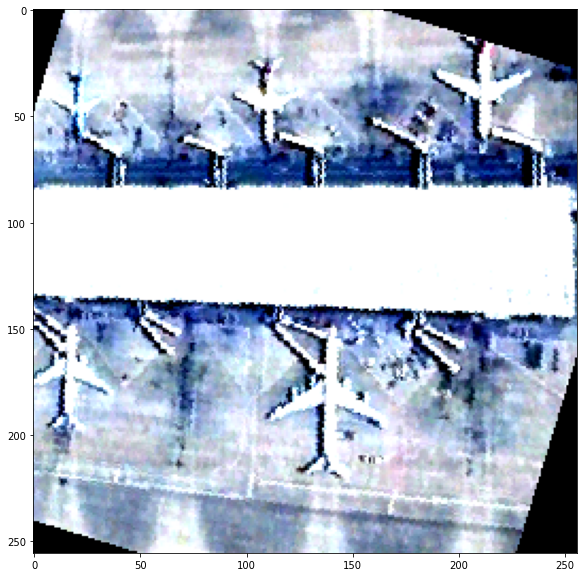

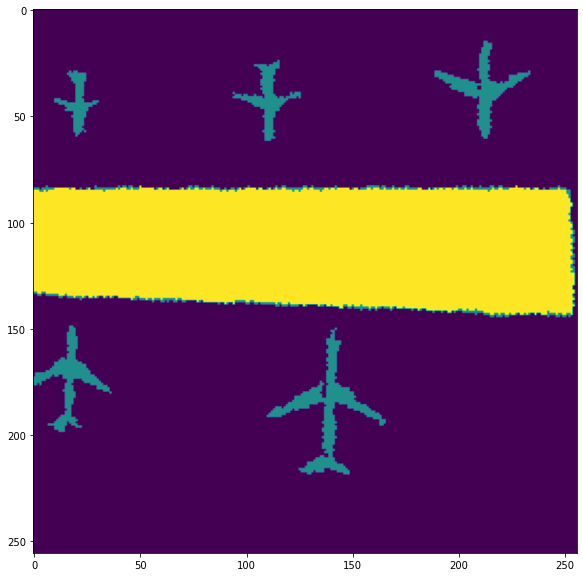

In [7]:
for i, train_data in enumerate(check_loader):
    images, segs, captions, lengths, ids= train_data
    images = images.permute(0, 2, 3, 1)
    segs = segs.permute(0, 2, 3, 1)
    print('images: ', images.size())
    print('images: ', images.dtype)
    print('segs: ', segs.size())
    print('segs: ', segs.dtype)
    plt.figure(figsize=(10,10))
    plt.imshow(images[0])
    plt.axis('on')
    plt.show()
    plt.figure(figsize=(10,10))
    plt.imshow(segs[0])
    plt.axis('on')
    plt.show()
    break

In [4]:
segs.dtype

torch.float32

In [6]:
np.unique(segs)

array([0, 1, 2, 3], dtype=int32)